In [30]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
rng = default_rng(2024)

In [8]:
raw_lexicon = np.loadtxt("https://raw.githubusercontent.com/dwyl/english-words/refs/heads/master/words.txt", dtype=str)

In [17]:
letters = np.array([l for l in "abcdefghijklmnopqrstuvwxyz"])
lexicon = np.array([w for w in raw_lexicon if np.all([l in letters for l in w])])
len(lexicon)

341122

In [42]:
lexicon_lens = np.array([len(w) for w in lexicon])
lexicon_by_len = [lexicon[lexicon_lens == i] for i in range(np.max(lexicon_lens)+1)]

In [35]:
l2i = {l:i for i,l in enumerate(letters)}
vowels = np.array([l for l in "aeiouy"])
non_plosives = np.array([l for l in "fhjlmnrsvwxz"])
plosives = np.array([l for l in "bcdgkpqt"])
l_code = {}
for i, group in enumerate([vowels, non_plosives, plosives]):
  for l in group:
    l_code[l] = i
str(l_code)

"{'a': 0, 'e': 0, 'i': 0, 'o': 0, 'u': 0, 'y': 0, 'f': 1, 'h': 1, 'j': 1, 'l': 1, 'm': 1, 'n': 1, 'r': 1, 's': 1, 'v': 1, 'w': 1, 'x': 1, 'z': 1, 'b': 2, 'c': 2, 'd': 2, 'g': 2, 'k': 2, 'p': 2, 'q': 2, 't': 2}"

In [20]:
temp = np.concatenate([letters, letters[:4]])
pentas = np.array([temp[i:i+5] for i in range(26)])
pentas

array([['a', 'b', 'c', 'd', 'e'],
       ['b', 'c', 'd', 'e', 'f'],
       ['c', 'd', 'e', 'f', 'g'],
       ['d', 'e', 'f', 'g', 'h'],
       ['e', 'f', 'g', 'h', 'i'],
       ['f', 'g', 'h', 'i', 'j'],
       ['g', 'h', 'i', 'j', 'k'],
       ['h', 'i', 'j', 'k', 'l'],
       ['i', 'j', 'k', 'l', 'm'],
       ['j', 'k', 'l', 'm', 'n'],
       ['k', 'l', 'm', 'n', 'o'],
       ['l', 'm', 'n', 'o', 'p'],
       ['m', 'n', 'o', 'p', 'q'],
       ['n', 'o', 'p', 'q', 'r'],
       ['o', 'p', 'q', 'r', 's'],
       ['p', 'q', 'r', 's', 't'],
       ['q', 'r', 's', 't', 'u'],
       ['r', 's', 't', 'u', 'v'],
       ['s', 't', 'u', 'v', 'w'],
       ['t', 'u', 'v', 'w', 'x'],
       ['u', 'v', 'w', 'x', 'y'],
       ['v', 'w', 'x', 'y', 'z'],
       ['w', 'x', 'y', 'z', 'a'],
       ['x', 'y', 'z', 'a', 'b'],
       ['y', 'z', 'a', 'b', 'c'],
       ['z', 'a', 'b', 'c', 'd']], dtype='<U1')

In [22]:
penta_codes = [np.array([l_code[l] for l in w]) for w in pentas]
penta_codes

[array([0, 2, 2, 2, 0]),
 array([2, 2, 2, 0, 1]),
 array([2, 2, 0, 1, 2]),
 array([2, 0, 1, 2, 1]),
 array([0, 1, 2, 1, 0]),
 array([1, 2, 1, 0, 1]),
 array([2, 1, 0, 1, 2]),
 array([1, 0, 1, 2, 1]),
 array([0, 1, 2, 1, 1]),
 array([1, 2, 1, 1, 1]),
 array([2, 1, 1, 1, 0]),
 array([1, 1, 1, 0, 2]),
 array([1, 1, 0, 2, 2]),
 array([1, 0, 2, 2, 1]),
 array([0, 2, 2, 1, 1]),
 array([2, 2, 1, 1, 2]),
 array([2, 1, 1, 2, 0]),
 array([1, 1, 2, 0, 1]),
 array([1, 2, 0, 1, 1]),
 array([2, 0, 1, 1, 1]),
 array([0, 1, 1, 1, 0]),
 array([1, 1, 1, 0, 1]),
 array([1, 1, 0, 1, 0]),
 array([1, 0, 1, 0, 2]),
 array([0, 1, 0, 2, 2]),
 array([1, 0, 2, 2, 2])]

In [27]:
row_i = 0
col_i = 1
row_v = penta_codes[row_i]
col_v = penta_codes[col_i]
temp = (row_v - col_v) % 3
nties = np.sum(temp == 0)
nrowwins = np.sum(temp == 1)
row_first_win = (temp[np.argmin(temp != 0)]==1)
temp, nties, nrowwins, row_first_win

(array([1, 0, 0, 2, 2]), 2, 1, False)

In [131]:
row_beats_col = np.zeros((26, 26))-2
reverses = np.zeros((26, 26))-2
for row_i in range(26):
  for col_i in range(26):
    row_v = penta_codes[row_i]
    col_v = penta_codes[col_i]
    temp = (row_v - col_v) % 3
    nties = np.sum(temp == 0)
    nrowwins = np.sum(temp == 1)
    ncolwins = np.sum(temp == 2)
    row_wins = np.zeros(5)
    row_wins[temp == 1] = 1
    row_wins[temp == 2] = -1
    if nties < 5:
      row_first_win = row_wins[row_wins != 0][0]
    else:
      row_first_win = 0
    if nrowwins != ncolwins:
      row_beats_col[row_i, col_i] = np.sign(nrowwins - ncolwins)
    elif nrowwins == ncolwins:
      row_beats_col[row_i, col_i] = row_first_win
    elif nties == 5:
      row_beats_col[row_i, col_i] = 0
    else:
      row_beats_col[row_i, col_i] = -1
    if nties % 2 == 0:
      reverses[row_i, col_i] = 0
    else:
      reverses[row_i, col_i] = 1

In [132]:
row_beats_col = row_beats_col.astype(int)
reverses = reverses.astype(int)

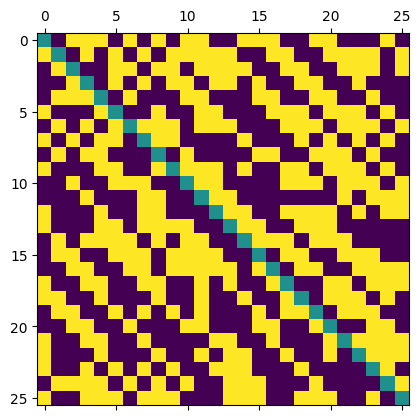

In [133]:
plt.matshow(row_beats_col)

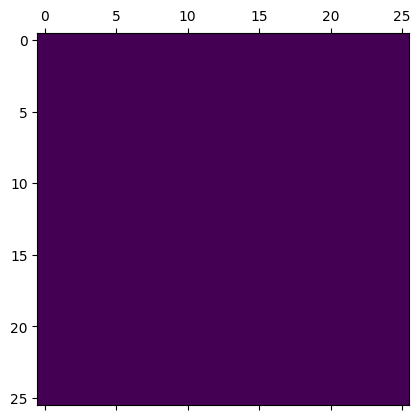

In [134]:
plt.matshow(row_beats_col + row_beats_col.T)

In [135]:
for i in range(26):
  print(letters[i] + " %i" % np.sum(row_beats_col[i,]==1))

a 13
b 16
c 15
d 11
e 11
f 12
g 16
h 11
i 10
j 14
k 13
l 9
m 13
n 12
o 14
p 14
q 16
r 13
s 11
t 12
u 10
v 12
w 11
x 10
y 12
z 14


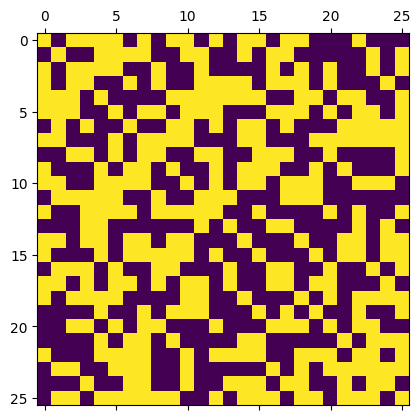

In [136]:
plt.matshow(reverses)

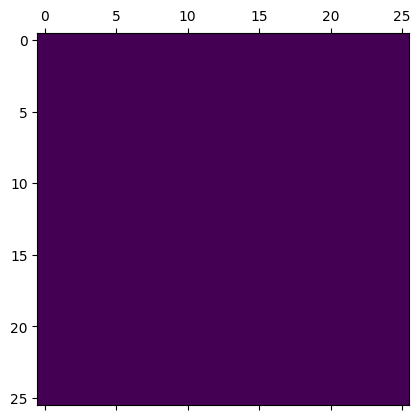

In [137]:
plt.matshow(reverses - reverses.T)

In [138]:
np.mean(reverses)

0.514792899408284

In [142]:
from typing_extensions import assert_never
def winner(w1, w2, verbose=False):
  if len(w1) > len(w2):
    return -winner(w2, w1)
  while len(w2) > len(w1):
    w1 = (w1 + w1)
  w1 = w1[:len(w2)]
  w1_wins = np.array([row_beats_col[l2i[w1[i]], l2i[w2[i]]] for i in range(len(w2))])
  revs = [reverses[l2i[w1[i]], l2i[w2[i]]] for i in range(len(w2))]
  w1_first = 0
  if np.sum(w1_wins != 0) > 0:
    w1_first = w1_wins[w1_wins!=0][0]
  rev_sign = 1
  if np.sum(revs) % 2 == 1:
    rev_sign = -1
  w1_score = np.sum(w1_wins)
  if verbose:
    print({"w1":w1, "w2":w2, "w1_wins":w1_wins, "revs":revs, "w1_first":w1_first, "rev_sign":rev_sign, "w1_score":w1_score})
  if w1_score != 0:
    return rev_sign * np.sign(w1_score)
  elif w1_score == 0:
    return rev_sign * w1_first
  else:
    assert_never()

In [143]:
w1,w2 = rng.choice(lexicon_by_len[2], 2)
w1,w2, winner(w1, w2)

('um', 'js', -1)

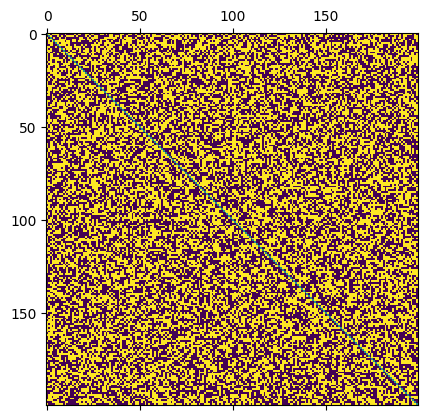

In [177]:
nsample = 200
ws = rng.choice(lexicon_by_len[7], nsample, replace=False)
outcomes = np.array([
    np.array([winner(w1,w2) for w2 in ws]) for w1 in ws
])
plt.matshow(outcomes)

In [178]:
np.nonzero(outcomes + np.eye(len(outcomes)) == 0)

(array([], dtype=int64), array([], dtype=int64))

In [179]:
winner(ws[0], ws[2], True)

{'w1': 'holloed', 'w2': 'mapwise', 'w1_wins': array([-1, -1, -1, -1,  1, -1, -1]), 'revs': [0, 1, 0, 0, 0, 1, 0], 'w1_first': -1, 'rev_sign': 1, 'w1_score': -5}


-1

In [180]:
np.max(np.abs(outcomes + outcomes.T))

0

In [181]:
rand_outcomes = rng.random((nsample, nsample))
rand_outcomes = np.sign(rand_outcomes - rand_outcomes.T)

(array([ 2., 10., 16., 32., 34., 33., 50., 12., 10.,  1.]),
 array([-0.205, -0.165, -0.125, -0.085, -0.045, -0.005,  0.035,  0.075,
         0.115,  0.155,  0.195]),
 <BarContainer object of 10 artists>)

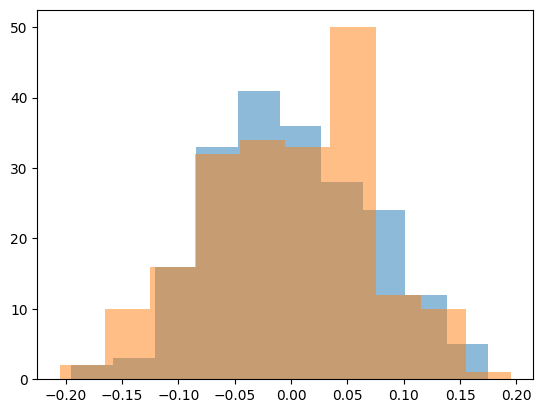

In [182]:
plt.hist(np.mean(rand_outcomes, axis=0), alpha=0.5)
plt.hist(np.mean(outcomes, axis=0), alpha=0.5)